# iPhone Classifier

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book() 
#if this cell is not working restart run time then execute the cell it will work try it

Mounted at /content/gdrive


In [ ]:
from fastbook import *

In [ ]:
iPhone_types = 'iPhone_12_Black','iPhone_1st'

In [ ]:
# iPhone_types = 'iPhone_12_Black','iPhone_13_pro','iPhone_1st','iPhone_11','iPhone_12_pro', 'iPhone_13','iPhone_3G_Black', 'iPhone_3G_White', 'iPhone_4', 'iPhone_4S', 'iPhone_5', 'iPhone_5C_Blue','iPhone_5C_Green', 'iPhone_5C_Pink', 'iPhone_5C_White', 'iPhone_5C_Yellow', 'iPhone_5S_Gold','iPhone_5S_Silver', 'iPhone_5S_Space_Gray', 'iPhone_6_Gold', 'iPhone_6_Silver', 'iPhone_6_Space_Gray','iPhone_6s_Gold', 'iPhone_6s_Rose_Gold', 'iPhone_6_Plus_Gold', 'iPhone_6_Plus_Silver', 'iPhone_6_Plus_Space_Gray', 'iPhone_7_Plus_Red', 'iPhone_7_Plus_Black', 'iPhone_7_Gold','iPhone_7_Black', 'iPhone_SE_Red', 'iPhone_X_Silver', 'iPhone_XS_Max_Gold', 'iPhone_5_black','iPhone_SE'

In [ ]:
path = Path('/content/gdrive/MyDrive/iPhone_less_data') #make sure you gave currect path from gdrive

In [ ]:
iPhone_types = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = iPhone_types.dataloaders(path)

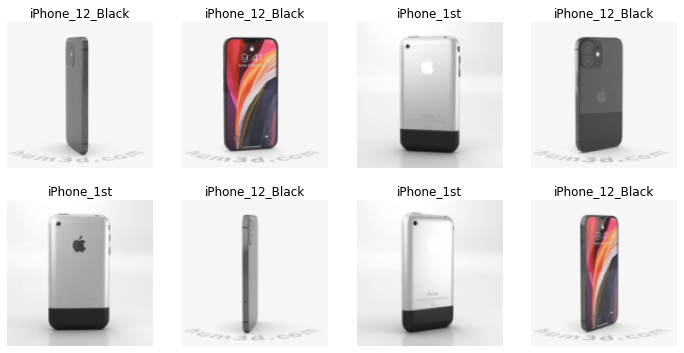

In [ ]:
dls.valid.show_batch(max_n=8, nrows=2)

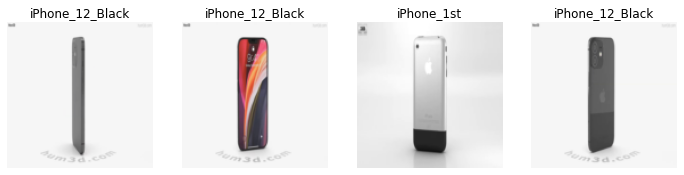

In [ ]:
iPhone_types = iPhone_types.new(item_tfms=Resize(128, ResizeMethod.Squish))
dls = iPhone_types.dataloaders(path)
dls.valid.show_batch(max_n=4, nrows=1)

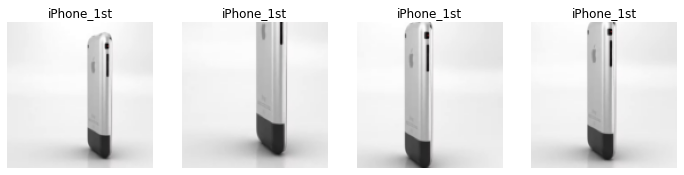

In [ ]:
iPhone_types = iPhone_types.new(item_tfms=RandomResizedCrop(128, min_scale=0.3))
dls = iPhone_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=4, nrows=1, unique=True)

# cropmethod avoid the overfitting 

The batch size is by default bs = 64. If you change that value for a lower one, it will work.

dls = Object_types.dataloaders(path,bs=5)


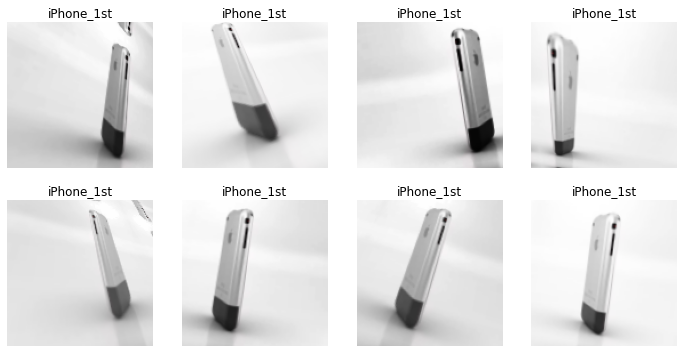

In [ ]:
iPhone_types = iPhone_types.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=2))
dls = iPhone_types.dataloaders(path,bs=64)
dls.train.show_batch(max_n=8, nrows=2, unique=True)

In [ ]:

iPhone_types = iPhone_types.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = iPhone_types.dataloaders(path)

In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.119334,0.314544,0.145161,00:30


epoch,train_loss,valid_loss,error_rate,time
0,0.274422,0.158304,0.048387,00:10
1,0.197597,0.023689,0.000000,00:10
2,0.131426,0.004026,0.000000,00:10
3,0.098163,0.001598,0.000000,00:10


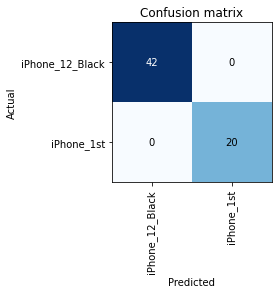

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

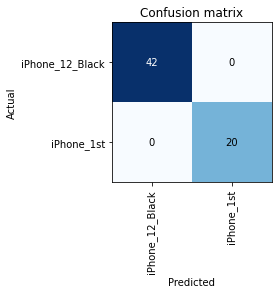

In [ ]:

interp.plot_confusion_matrix()

In [ ]:
interp.plot_confusion_matrix(normalize:bool=False, title:str='Confusion matrix', cmap:Any='Blues', 
                      slice_size:int=1, norm_dec:int=2, plot_txt:bool=True, return_fig:bool=None,
                      **kwargs) → Optional[Figure])

SyntaxError: ignored

In [ ]:
interp.plot_top_losses(4, nrows=1)

In [ ]:
from fastai.vision.widgets import *

In [ ]:
#hide_output
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete(): cleaner.fns[idx].unlink()

In [ ]:
for idx,cat in cleaner.change(): shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')


In [ ]:
learn_inf = load_learner(path/'export.pkl')

In [ ]:
learn_inf.predict('/content/gdrive/MyDrive/iPhone_less_data/iPhone_1st/iPhone_1st_gen_Black100.jpg')

In [ ]:
learn_inf.dls.vocab

## Creating a Notebook App from the Model


In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
#hide
# For the book, we can't actually click an upload button, so we fake it
btn_upload = SimpleNamespace(data = ['/content/gdrive/MyDrive/iPhone_less_data/iPhone_1st/iPhone_1st_gen_Black100.jpg'])

In [ ]:
img = PILImage.create(btn_upload.data[-1])

In [ ]:
# hide_output
out_pl = widgets.Output()
out_pl.clear_output()
with out_pl: display(img.to_thumb(128,128))
out_pl

In [ ]:
pred,pred_idx,probs = learn_inf.predict(img)

In [ ]:
#hide_output
lbl_pred = widgets.Label()
lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
lbl_pred

In [ ]:
btn_run = widgets.Button(description='Classify')
btn_run

In [ ]:
def on_click_classify(change):
 img = PILImage.create(btn_upload.data[-1])
 out_pl.clear_output()
 with out_pl: display(img.to_thumb(128,128))
 pred,pred_idx,probs = learn_inf.predict(img)
 lbl_pred.value = f'Prediction: {pred}; Probability: {probs[pred_idx]:.04f}'
btn_run.on_click(on_click_classify)

In [ ]:
#hide_output
btn_upload = widgets.FileUpload()
btn_upload

In [ ]:
VBox([widgets.Label('Select your iPhone!'),
      btn_upload, btn_run, out_pl, lbl_pred])